# Projeto 7 
---
Análise de uma nova empresa de compartilhamento de caronas chamada Zuber que está sendo lançada em Chicago. Minha tarefa é
encontrar padrões nas informações disponíveis. Quero entender as preferências dos passageiros e o impacto de fatores externos nas corridas. Trabalhando com um banco de dados, analisarei dados de concorrentes etestarei uma hipótese sobre o impacto do clima na frequência das viagens.

### Etapa 4. EDA Python
___

Abertura e leitura do arquivo de dados e estudando as informações gerais

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

sns.set_palette('rainbow')
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 2.5})

In [2]:
df_trips_amount = pd.read_csv('project_sql_result_01.csv')
df_drop_locations = pd.read_csv('project_sql_result_04.csv')

In [3]:
df_trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_trips_amount.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
df_drop_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df_drop_locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
df_drop_locations['average_trips'] = round(
    df_drop_locations['average_trips'], 1)

#### Problemas encontrados até o momento: 
* A principio nenhum problema encontrado nos dados até o momento 

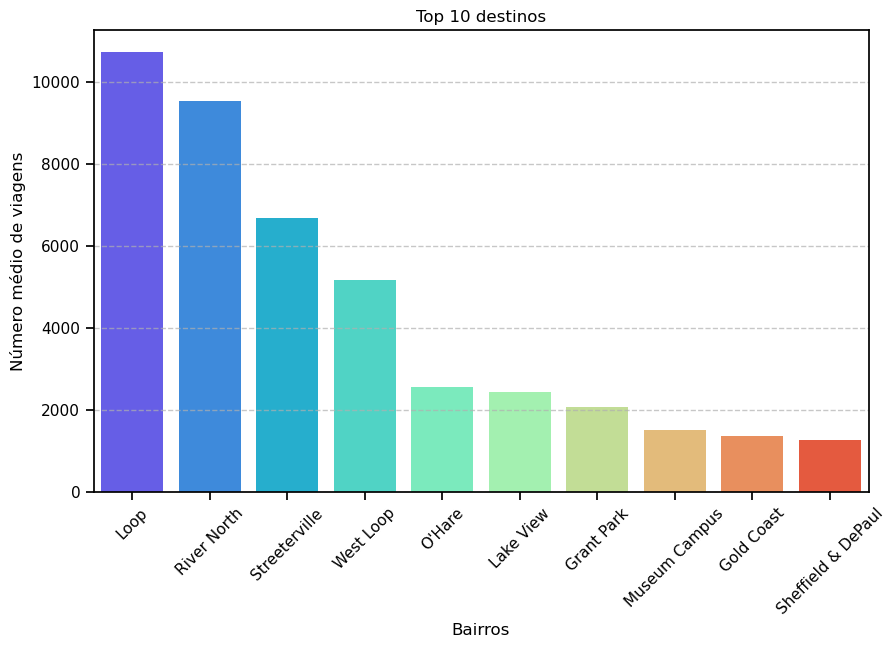

In [8]:
# identificando os 10 principais bairros em termos de destinos
top_10_locations = df_drop_locations.nlargest(10, 'average_trips')

plt.figure(figsize=(10, 6))
sns.barplot(top_10_locations, x='dropoff_location_name',
            y='average_trips', palette="rainbow")
plt.title('Top 10 destinos')
plt.xlabel('Bairros')
plt.ylabel('Número médio de viagens')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

No gráfico acima podemos observar os top 10 bairros em termos de destino em novembro de 2017, com destaque para os bairros Loop e River North

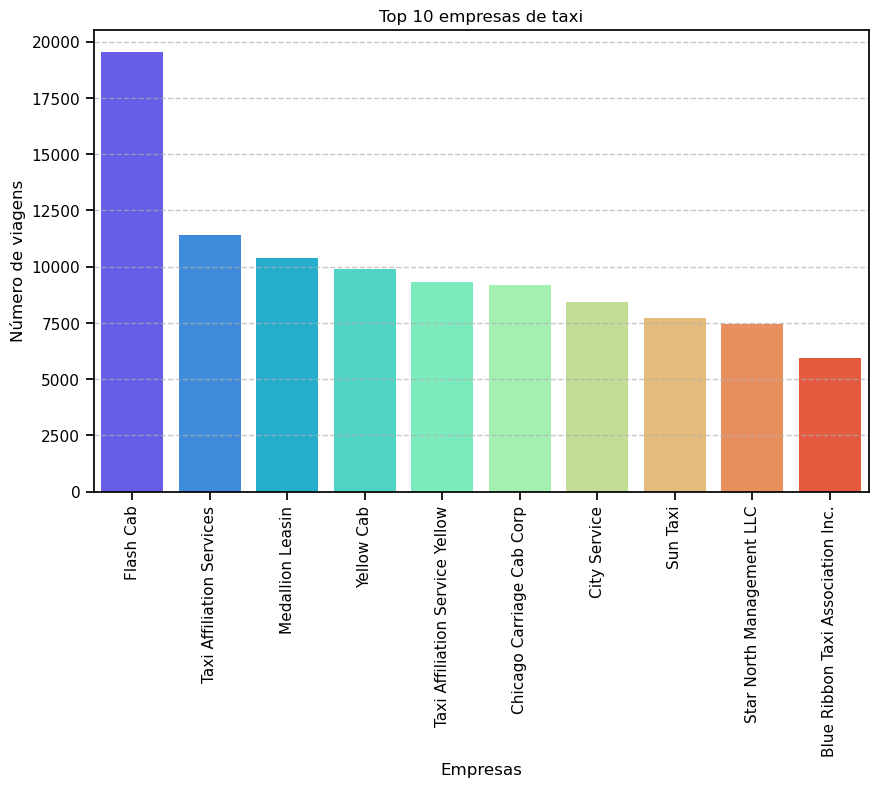

In [9]:
# identificando as 10 principais empresas em número de corridas

top_10_companies = df_trips_amount.nlargest(10, 'trips_amount')

plt.figure(figsize=(10, 6))
sns.barplot(top_10_companies, x='company_name',
            y='trips_amount', palette="rainbow")
plt.title('Top 10 empresas de taxi')
plt.xlabel('Empresas')
plt.ylabel('Número de viagens')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

No gráfico acima podemos observar as 10 principais empresas de acordo com o número de corridas, observamos que a empresa Flash Cab lidera com o dobro de número de corridas do segundo colocado

### Etapa 5. Testando hipóteses (Python)
---
"A duração média dos passeios do bairro Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

In [10]:
# df com dados sobre viagens do Loop para o Aeroporto Internacional O'Hare
df = pd.read_csv('project_sql_result_07.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [13]:
df_w_good = df[df['weather_conditions'] == 'Good']
df_w_bad = df[df['weather_conditions'] == 'Bad']
print("Tamanho da amostra weather good:", df_w_good['weather_conditions'].size)
print("Tamanho da amostra weather bad:", df_w_bad['weather_conditions'].size)
print("Variancia weather Good: ", np.var(df_w_good['duration_seconds']))
print("Variancia weather Bad: ", np.var(df_w_bad['duration_seconds']))

Tamanho da amostra weather good: 888
Tamanho da amostra weather bad: 180
Variancia weather Good:  575732.9308497686
Variancia weather Bad:  517403.5633024689


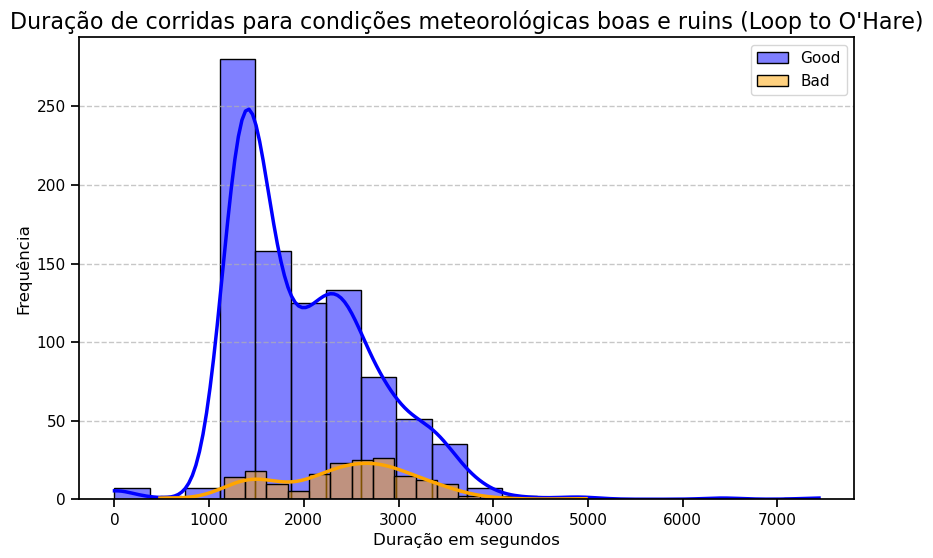

Skew good:  1.17054233387238
Skew bad:  -0.09132457068908117


In [14]:
# plotando histograma
plt.figure(figsize=(10, 6))

# hist 1
sns.histplot(df_w_good, x='duration_seconds', color='blue',
             label='Good', kde=True, alpha=0.5, bins=20)

# hist 2
sns.histplot(df_w_bad, x='duration_seconds', color='orange',
             label='Bad', kde=True, alpha=0.5, bins=20)

# Adicionando rótulos
plt.title("Duração de corridas para condições meteorológicas boas e ruins (Loop to O'Hare)", fontsize=16)
plt.xlabel('Duração em segundos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Skew good: ", df_w_good['duration_seconds'].skew())
print("Skew bad: ", df_w_bad['duration_seconds'].skew())

Observando os gráficos acima, aparentemente a média das duas amostras são diferentes com a amostra de tempo bom com assimetria para a direita e um desvio padrão menor o que produz uma curva mais alta. Já no tempo ruim temos um gráfico praticamente sem curva o que dá a entender um alto desvio padrão e que não se parece com uma distribuição normal 

* ##### Hipótese nula: A média da duração das corridas são iguais entre dias chuvosos e ensolarados
* ##### Hipótese alternativa: A média da duração das corridas são diferentes entre dias chuvosos e ensolarados

In [15]:
alpha = .05

results = st.ttest_ind(
    df_w_good['duration_seconds'], df_w_bad['duration_seconds'], equal_var=False)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

valor-p: 6.738994326108734e-12
Rejeitamos a hipótese nula


##### Conclusão:
A análise sugere que a duração média dos passeios entre Loop e o aeroporto Internacional O'Hare difere entre sábados chuvoso e ensolarados. Considerando que a hipótese nula fosse verdadeira o valor p está muito abaixo de alpha o que nos diz que há uma diferença significativa entre as médias

H₀ = Não há diferença entre os grupos | 
H₁ = Há diferença entre os grupos

O Teste de Welch's T-test para 2 amostras independentes foi usado pois se tratava de um teste estátistico com 2 variaveis (1 qualitativa e 1 quantitativa), partindo da premisa de duas amostras independentes de tamanhos diferentes, paramétricas e com variancias diferentes 